In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [84]:
df=pd.read_csv("credit_risk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
(df.isna().sum()/len(df))

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
len(df)

614

In [8]:
data=df.dropna()

In [9]:
len(data)

480

# Exploratory Data Analysis

In [10]:
#Applicant Income and Co-Applicant 

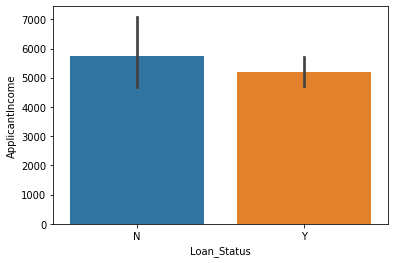

In [11]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=data)

In [12]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               54
               Y               85
Semiurban      N               42
               Y              149
Urban          N               52
               Y               98
Name: Loan_Status, dtype: int64

In [13]:
#Probability
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()/data.groupby(['Property_Area'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N              0.388489
               Y              0.611511
Semiurban      N              0.219895
               Y              0.780105
Urban          N              0.346667
               Y              0.653333
Name: Loan_Status, dtype: float64

In [14]:
data.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()/data.groupby(['Credit_History'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N              0.900000
                Y              0.100000
1.0             N              0.207317
                Y              0.792683
Name: Loan_Status, dtype: float64

In [15]:
data.Loan_Amount_Term.value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [16]:
data.Loan_Amount_Term.value_counts()/len(data.Loan_Amount_Term)

360.0    0.856250
180.0    0.075000
480.0    0.025000
300.0    0.018750
84.0     0.006250
120.0    0.006250
36.0     0.004167
240.0    0.004167
60.0     0.004167
Name: Loan_Amount_Term, dtype: float64

In [17]:
data.groupby(['Married','Loan_Status'])['Loan_Status'].count()/data.groupby(['Married'])['Loan_Status'].count()

Married  Loan_Status
No       N              0.378698
         Y              0.621302
Yes      N              0.270096
         Y              0.729904
Name: Loan_Status, dtype: float64

In [18]:
data.groupby(['Education','Loan_Status'])['Loan_Status'].count()/data.groupby(['Education'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              0.292428
              Y              0.707572
Not Graduate  N              0.371134
              Y              0.628866
Name: Loan_Status, dtype: float64

In [19]:
output=data[data.CoapplicantIncome==0].groupby(['Married','Loan_Status'])['Loan_Status'].count()/data[data.CoapplicantIncome==0].groupby(['Married'])['Loan_Status'].count()

In [20]:
output.index

MultiIndex([( 'No', 'N'),
            ( 'No', 'Y'),
            ('Yes', 'N'),
            ('Yes', 'Y')],
           names=['Married', 'Loan_Status'])

In [21]:
output.values

array([0.39473684, 0.60526316, 0.29411765, 0.70588235])

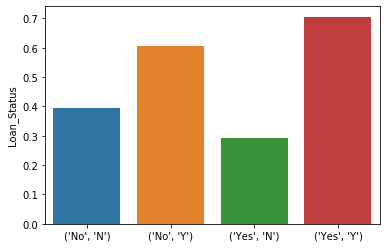

In [22]:
sns.barplot(output.index,output)

In [23]:
data.groupby(['Education','Self_Employed','Loan_Status'])['Loan_Status'].count()/data.groupby(['Education'])['Loan_Status'].count()

Education     Self_Employed  Loan_Status
Graduate      No             N              0.245431
                             Y              0.616188
              Yes            N              0.046997
                             Y              0.091384
Not Graduate  No             N              0.319588
                             Y              0.546392
              Yes            N              0.051546
                             Y              0.082474
Name: Loan_Status, dtype: float64

In [24]:
data[(data.Dependents.isin(["2","3+"])) &(data.Gender=="Male")]\
     .Loan_Amount_Term.mean()

334.90909090909093

# Data Preparation

In [25]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
X=data[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']].copy()

In [27]:
y=data['Loan_Status'].copy()

In [28]:
def data_clean(X):
    X=X.copy()
    X.Gender=X.Gender.map(lambda x:1 if x=="Male" else 0)
    X.Married=X.Married.map(lambda x:1 if x=="Yes" else 0)
    X.Dependents=X.Dependents.map(lambda x:3 if x=="3+" else int(x))
    X.Education=X.Education.map(lambda x:1 if x=="Graudate" else 0)
    X.Self_Employed=X.Self_Employed.map(lambda x:1 if x=="Yes" else 0)
    X=X.join(pd.get_dummies(X.Property_Area)).drop(["Property_Area"],axis=1)
    #print (X.columns)
    return X[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban']]

    
    

In [29]:
data_clean(X).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [30]:
data_clean(X)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,0,0,1


In [31]:
X=data_clean(X)

In [32]:
y=y.map(lambda x:1 if x=="Y" else 0)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
for m,col in zip(lr.coef_[0],X_train.columns):
    print(m,"*",col,"+")
print(lr.intercept_[0])

0.2769478398230736 * Gender +
0.3956562555648889 * Married +
0.16567994494688312 * Dependents +
0.0 * Education +
-0.09340120461653587 * Self_Employed +
-1.4036773376748839e-05 * ApplicantIncome +
-8.11346499484115e-05 * CoapplicantIncome +
-0.002597055955147509 * LoanAmount +
-0.0026084304295400686 * Loan_Amount_Term +
2.1179756569007706 * Credit_History +
-0.46879879089453014 * Rural +
0.6705683361304952 * Semiurban +
-0.14006085749080005 * Urban +
0.06170868774516529


In [36]:
lr.predict_proba(X_train)[:,1]

array([0.87251601, 0.88567233, 0.8158086 , 0.63723096, 0.34494093,
       0.31673113, 0.94263177, 0.72893051, 0.85262467, 0.67202546,
       0.2546702 , 0.8236696 , 0.56370687, 0.87723257, 0.81891244,
       0.86772039, 0.64933955, 0.74911515, 0.89156166, 0.91821529,
       0.67069112, 0.72656019, 0.74334332, 0.73958941, 0.79665592,
       0.76649337, 0.33463687, 0.67637677, 0.82918247, 0.78495695,
       0.94262326, 0.86773716, 0.84700606, 0.87398205, 0.8689822 ,
       0.5655225 , 0.75384763, 0.72025045, 0.70771846, 0.94501502,
       0.64125803, 0.59634352, 0.91269583, 0.8330181 , 0.79387932,
       0.76888179, 0.85423353, 0.58568382, 0.52058835, 0.79741848,
       0.84742512, 0.87137825, 0.83190355, 0.72356345, 0.89779135,
       0.87292444, 0.83001295, 0.67191575, 0.20879254, 0.6558405 ,
       0.7726399 , 0.90363937, 0.71649283, 0.9262574 , 0.86105143,
       0.77007353, 0.57000126, 0.80609595, 0.64408806, 0.82312967,
       0.90423196, 0.56916985, 0.90080797, 0.87837433, 0.72778

In [37]:
lr.predict(X_train)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [38]:
lr.score(X_train,y_train)

0.8151041666666666

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,lr.predict(X_train)))

[[ 48  63]
 [  8 265]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57       111
           1       0.81      0.97      0.88       273

    accuracy                           0.82       384
   macro avg       0.83      0.70      0.73       384
weighted avg       0.82      0.82      0.79       384



In [41]:
#Probability caliberation

y_prob=lr.predict_proba(X_train)[:,1]

In [42]:
y_hat=[]
for i in y_prob:
    if i>0.7:
        y_hat.append(1)
    else:
        y_hat.append(0)


In [43]:
print(confusion_matrix(y_train,y_hat))
print(classification_report(y_train,y_hat))

[[ 69  42]
 [ 51 222]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       111
           1       0.84      0.81      0.83       273

    accuracy                           0.76       384
   macro avg       0.71      0.72      0.71       384
weighted avg       0.76      0.76      0.76       384



In [44]:
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [45]:
test=df[~df.index.isin(data.index)]

In [46]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [47]:
test.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
data.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [49]:
data.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [50]:
data.Dependents.value_counts()/len(data)

0     0.570833
2     0.177083
1     0.166667
3+    0.085417
Name: Dependents, dtype: float64

In [51]:
data.LoanAmount.median()

128.0

In [52]:
data.Loan_Amount_Term.median()

360.0

In [53]:
data.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [54]:
def data_impute(x):
    x=x.copy()
    x.Gender=x.Gender.fillna("Male")
    x.Married=x.Married.fillna("Yes")
    x.Dependents=x.Dependents.fillna("0")
    x.Self_Employed=x.Self_Employed.fillna("No")
    x.LoanAmount=x.LoanAmount.fillna(128.0)
    x.Loan_Amount_Term=x.Loan_Amount_Term.fillna(360.0)
    x.Credit_History=x.Credit_History.fillna(1.0)
    
    return  x
    
    
    

In [55]:
#data_impute(test)

In [56]:
#data_clean(data_impute(test))

In [57]:
X_test=data_clean(data_impute(test))
y_test=test.Loan_Status.map(lambda x:1 if x=="Y" else 0)
#data_clean(data_impute(test))

In [58]:
y_hat_test=lr.predict(X_test)
print(y_hat_test)
print(confusion_matrix(y_train,y_hat_test))
print(classification_report(y_train,y_hat_test))

[1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1]


ValueError: Found input variables with inconsistent numbers of samples: [384, 134]

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
print("Accuracy of training",dtc.score(X_train,y_train))
print("Accuracy of testing",dtc.score(X_test,y_test))

Accuracy of training 1.0
Accuracy of testing 0.6865671641791045


In [64]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file="tree.dot",feature_names=X_train.columns)


In [67]:
for depth in range(1,21):
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtc.fit(X_train,y_train)
    print(depth,"Accuracy of training",dtc.score(X_train,y_train))
    print(depth, "Accuracy of testing",dtc.score(X_test,y_test))

1 Accuracy of training 0.8151041666666666
1 Accuracy of testing 0.8134328358208955
2 Accuracy of training 0.8151041666666666
2 Accuracy of testing 0.8134328358208955
3 Accuracy of training 0.8229166666666666
3 Accuracy of testing 0.7835820895522388
4 Accuracy of training 0.8359375
4 Accuracy of testing 0.7835820895522388
5 Accuracy of training 0.8515625
5 Accuracy of testing 0.7910447761194029
6 Accuracy of training 0.875
6 Accuracy of testing 0.7686567164179104
7 Accuracy of training 0.8802083333333334
7 Accuracy of testing 0.7686567164179104
8 Accuracy of training 0.8958333333333334
8 Accuracy of testing 0.7611940298507462
9 Accuracy of training 0.9010416666666666
9 Accuracy of testing 0.7611940298507462
10 Accuracy of training 0.90625
10 Accuracy of testing 0.7611940298507462
11 Accuracy of training 0.90625
11 Accuracy of testing 0.7611940298507462
12 Accuracy of training 0.9114583333333334
12 Accuracy of testing 0.7686567164179104
13 Accuracy of training 0.9166666666666666
13 Accur

In [72]:
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=3)
    dtc.fit(X_train,y_train)
    print(depth,"Accuracy of training",dtc.score(X_train,y_train))
    print(depth, "Accuracy of testing",dtc.score(X_test,y_test))

20 Accuracy of training 0.8229166666666666
20 Accuracy of testing 0.7835820895522388


In [74]:
export_graphviz(dtc,out_file="tree_3.dot",feature_names=X_train.columns)

In [75]:
#grid Search approach for pruning tree

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score

scorer=make_scorer(accuracy_score,greater_is_better=True)

parameters={'max_depth':[1,2,3,4,5,6],'min_samples_split':[2,3,4,5,6],'class_weight':["balanced",None]}
dtc=DecisionTreeClassifier(criterion="entropy")
clf=GridSearchCV(dtc,parameters,cv=5,n_jobs=1,verbose=1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished
C:\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                 

In [81]:
print(clf.best_score_)
clf.best_estimator_

0.8151041666666666


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
final_model=clf.best_estimator_
final_model.fit(X_train,y_train)
print(final_model.score(X_train,y_train))
print(final_model.score(X_test,y_test))

0.8151041666666666
0.8134328358208955
